# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь")**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

**Считаем данные из файла**

In [2]:
data = pd.read_csv('titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые строки:**

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=S) и заплатили менее 170 у.е. за билет (fare < 170).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [6]:
data[(data['Embarked'] == 'S') & (data.Fare < 170)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**Можно отсортировать этих людей по убыванию платы за билет.**

In [7]:
data[(data['Embarked'] == 'S') & 
     (data['Fare'] < 170)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S
333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
610,1,1,"Shutes, Miss. Elizabeth W",female,40.0,0,0,PC 17582,153.4625,C125,S


**Пример создания признака.**

In [8]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age <= 30:
        return 'age<=30'
    elif age >= 60:
        return 'age>=60'
    else:
        return '30<age<60'

In [9]:
data['Age_category'] = data['Age'].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [10]:
print(data["Sex"].value_counts())
print("Ответ 4 верный")

Sex
male      577
female    314
Name: count, dtype: int64
Ответ 4 верный


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [11]:
data.groupby(['Pclass']).describe()

Survived                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
Pclass                                                                
1         216.0  0.629630  0.484026  0.0  0.0  1.0  1.0  1.0  186.0   
2         184.0  0.472826  0.500623  0.0  0.0  0.0  1.0  1.0  173.0   
3         491.0  0.242363  0.428949  0.0  0.0  0.0  0.0  1.0  355.0   

                   ... Parch        Fare                                       \
             mean  ...   75%  max  count       mean        std  min       25%   
Pclass             ...                                                          
1       38.233441  ...   0.0  4.0  216.0  84.154687  78.380373  0.0  30.92395   
2       29.877630  ...   1.0  3.0  184.0  20.662183  13.417399  0.0  13.00000   
3       25.140620  ...   0.0  6.0  491.0  13.675550  11.778142  0.0   7.75000   

                                 
            50%   75%       max  
Pclass                           
1       60.2875  93.5  512.3292  
2       14.2500  26.0   73.5000  
3        8.0500  15.5   69.5500  

[3 rows x 40 columns]

In [12]:
data[(data['Sex']=='male') & (data['Pclass']==2)].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,108.000000,108.0,99.000000,108.000000,108.000000,108.000000
mean,0.157407,2.0,30.740707,0.342593,0.222222,19.741782
std,0.365882,0.0,14.793894,0.566380,0.517603,14.922235
min,0.000000,2.0,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.0,23.000000,0.000000,0.000000,12.331250
50%,0.000000,2.0,30.000000,0.000000,0.000000,13.000000
75%,0.000000,2.0,36.750000,1.000000,0.000000,26.000000
max,1.000000,2.0,70.000000,2.000000,2.000000,73.500000


In [13]:
print("Мужчин 2го класса было 108")

Мужчин 2го класса было 108


In [14]:
pd.crosstab(data['Sex'],data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [15]:
data['Fare'].describe().round(2)

count    891.00
mean      32.20
std       49.69
min        0.00
25%        7.91
50%       14.45
75%       31.00
max      512.33
Name: Fare, dtype: float64

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [16]:
data['Age_category'].value_counts()

Age_category
30<age<60    456
age<=30      409
age>=60       26
Name: count, dtype: int64

In [17]:
data[['Survived','Age_category']].value_counts()

Survived  Age_category
0         30<age<60       287
          age<=30         243
1         30<age<60       169
          age<=30         166
0         age>=60          19
1         age>=60           7
Name: count, dtype: int64

In [18]:
pd.crosstab(data['Age_category'],data['Survived'],margins=True,normalize=True)

Survived,0,1,All
Age_category,,,
30<age<60,0.322110,0.189675,0.511785
age<=30,0.272727,0.186308,0.459035
age>=60,0.021324,0.007856,0.029181
All,0.616162,0.383838,1.000000


In [19]:
data.groupby('Age_category')['Survived'].mean()*100


Age_category
30<age<60    37.061404
age<=30      40.586797
age>=60      26.923077
Name: Survived, dtype: float64

In [20]:
print("Ответ скорее всего 3")

Ответ скорее всего 3


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [21]:
pd.crosstab(data['Sex'],data['Survived'],margins=True,normalize=True)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [22]:
data.groupby('Sex')['Survived'].mean()*100


Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [23]:
print("Ответ 4")

Ответ 4


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [24]:
def pull_name(name):
    name_parts=name.split('.')
    i_cur=name_parts[1]
    i_cur=i_cur.split()[0]
    return i_cur

In [25]:
data['First Name'] = data['Name'].apply(pull_name)

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,First Name
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,age<=30,Owen
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30<age<60,John
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,age<=30,Laina
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30<age<60,Jacques
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30<age<60,William


In [27]:
data[['First Name','Sex']].value_counts()

First Name  Sex   
William     male      35
John        male      25
George      male      14
William     female    13
Charles     male      13
                      ..
Gerda       female     1
Georgette   female     1
Fridtjof    male       1
Frederic    male       1
of          female     1
Name: count, Length: 490, dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

In [28]:
data_sur=data.groupby(['Survived']).agg({'Fare': [ 'mean'],
        'Age' : ['mean']})
print(data_sur)

               Fare        Age
               mean       mean
Survived                      
0         22.117887  30.626179
1         48.395408  28.343690


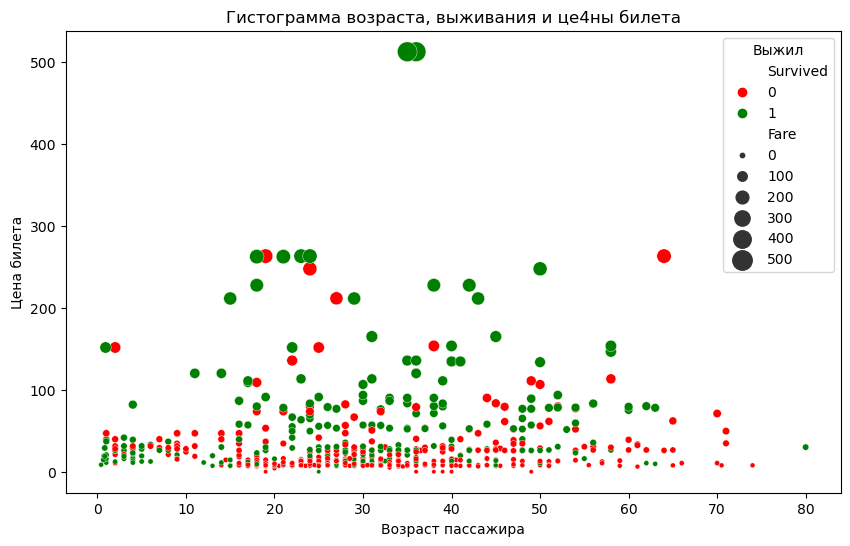

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette={0: 'red', 1: 'green'}, size='Fare', sizes=(10, 200))
plt.title('Гистограмма возраста, выживания и це4ны билета')
plt.xlabel('Возраст пассажира')
plt.ylabel('Цена билета')
plt.legend(title='Выжил')
plt.show()


In [54]:
data[(data['Fare']>200) & (data['Survived']==0)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,First Name
PassengerId,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,age<=30,Charles
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,age<=30,Quigg
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,age<=30,Harry
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,age>=60,Mark
528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,30<age<60,John
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,30<age<60,Victor


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [30]:
pd.crosstab(data['Sex'],data['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [31]:
data.groupby(['Pclass']).agg({
        'Age' : ['mean']})

,Age
,mean
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [32]:
data.groupby([data['Sex']]).agg({
        'Age' : ['mean']})

,Age
,mean
Sex,
female,27.915709
male,30.726645


In [33]:
pd.pivot_table(data, values='Age', index='Sex', columns='Pclass', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,34.611765,28.722973,21.750000
male,41.281386,30.740707,26.507589
